## **Exploratory Data Analysis (EDA)**

In this section, we will perform a comprehensive exploration of the dataset to uncover underlying patterns, relationships, and trends. The goal is to gain insights into the key factors influencing employee behavior and attrition.


In [1]:
 # Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
 # Setting up the visualization style 
sns.set_style( style = 'darkgrid' )
sns.set_palette( palette = 'icefire' )

In [3]:
 # Loading the Dataset 
DATA = pd.read_csv( 'HR_Employee_Attrition.csv' )

In [4]:
 # Getting the statistical summary
display( DATA.describe() . T )

display( DATA.describe( include = 'object') . T )

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


### **Descriptive Statistics Summary**

#### **Numerical Features:**

* The **average age** of employees is **36.92 years**, with a range from **18 to 60 years**.
* The **mean hourly rate** is **\$65.89**, with values ranging from **\$30 to \$100**.
* The **average percentage salary hike** is **15.29%**, with the minimum at **3.6%** and the maximum at **25%**.
* The **mean monthly income** is **\$6,502**, ranging from **\$1,009 to \$19,999**.
* The **average job satisfaction rating** is **2.78**, on a scale of **1 to 4**.
* The **average work-life balance rating** is **2.76**, also on a **1 to 4 scale**.

#### **Categorical Features:**

* Out of 1,470 employees, **1,233 have not left** the company, indicating that the **Attrition** variable is imbalanced.
* The majority of employees **travel rarely** for business.
* The **Research & Development department** has the highest number of employees, with **961 staff members**.
* The dataset shows a **majority of male employees**.
* **Most employees are married**.
* **All employees are over the age of 18**.
* The majority of employees **do not work overtime**.


### **Categorical - Categorical Analysis**

In [55]:
 # Creating Function 

def plots ( data , column ):
    
    uniq = data[column].nunique()
    count = data[column].value_counts()
    perc = (count / count.sum())*100
    
    if uniq == 3 :

        # Plot the counts as a bar plot
        fig , ax = plt.subplots( 1 , 2 ,figsize = ( 20, 6))
        count.plot( kind = 'bar' , stacked = False , ax = ax[0]  )

        ax[0].set_title('Employee ' + column + ' Count', fontweight='bold'  )
        ax[0].set_xlabel(column, fontweight='bold')
        ax[0].set_ylabel('Count', fontweight='bold')

         # Pie chart
        ax[1].pie(perc, labels=perc.index, autopct='%1.1f%%',  startangle=90 , colors = ['#3B5B8A', '#A3C4EB' , '#FFDE70'] )
        ax[1].set_title('Employee ' + column + ' Percentage', fontweight='bold')
    

        return plt.show
    
    elif uniq < 3 :
         # Plot the counts as a bar plot
        fig , ax = plt.subplots( 1 , 2 ,figsize = ( 20, 6))
        count.plot( kind = 'bar' , stacked = False , ax = ax[0]  )

        ax[0].set_title('Employee ' + column + ' Count', fontweight='bold' )
        ax[0].set_xlabel(column, fontweight='bold')
        ax[0].set_ylabel('Count', fontweight='bold')

         # Pie chart
        ax[1].pie(perc, labels=perc.index, autopct='%1.1f%%',  startangle=90 , colors = ['#3B5B8A', '#A3C4EB'] )
        ax[1].set_title('Employee ' + column + ' Percentage', fontweight='bold')

        return plt.show 
    
    else:

        colors = ['#FF5733'] + ['#1f77b4'] * (uniq - 1)
        ax = count.plot( kind = 'bar' , figsize = ( 20 , 6) , color = colors  )

        # Add labels and title
        plt.title('Employee ' + column + ' Count and Percentage ', fontweight='bold')
        plt.xlabel(column , fontweight='bold')
        plt.ylabel('Count', fontweight='bold')
        plt.xticks(rotation=0)

        # Annotate the bars with percentages
        for i in range(len(count)):
            barval = count.iloc[i]
            percentage = perc.iloc[i]
            ax.text(i, barval + 0.5, f'{percentage:.2f}%', ha='center', fontweight='bold')


        return plt.show()
    

 # Categorical - Categorical Function
def cat_plot( data , var1 , var2 ):

    # Getting the contingency Table 
    ct = pd.crosstab( data[var1] , data[var2] )
    ct_per = pd.crosstab( data[var1] , data[var2] , normalize = 'index' ) * 100
    uniq = data[var2].nunique() # Getting no of unique values 
    
    if uniq <= 3 :
        # Plotting the bar plot with the crosstab result
        fig , ax = plt.subplots( 1 , 2 ,figsize = ( 20, 6 ))

        ct.plot(kind='bar', stacked=False, ax = ax[0]  )
        ct_per.plot(kind='bar', stacked=False, ax = ax[1] )

        ax[0].set_title( 'Attrition Count by '+ var2 , fontweight = 'bold')
        ax[0].set_ylabel( 'Count' , fontweight = 'bold')
        ax[0].set_xlabel('Attrition' , fontweight = 'bold')

        ax[1].set_title( 'Attrition Rate by ' +  var2 , fontweight = 'bold')
        ax[1].set_ylabel( 'Rate' , fontweight = 'bold')
        ax[1].set_xlabel('Attrition' , fontweight = 'bold')

         # Annotating the bars 
        for p in ax[1].patches:
            height = p.get_height()
    
            ax[1].annotate(f'{height:.1f}%', 
                        (p.get_x() + p.get_width() / 2., height),  
                        ha='center', va='bottom')  

        return plt.show()
    
    else :
         # plotting for more than 3 Categories
        fig , ax = plt.subplots( 2 , 1 ,figsize = ( 20, 14 ))

        ct.plot(kind='bar', stacked=False, ax = ax[0])
        ct_per.plot(kind='bar', stacked=False, ax = ax[1])

        ax[0].set_title( 'Attrition Count by '+ var2 , fontweight = 'bold')
        ax[0].set_ylabel( 'Count' , fontweight = 'bold')
        ax[0].set_xlabel('Attrition' , fontweight = 'bold')

        ax[1].set_title( 'Attrition Rate by ' +  var2 , fontweight = 'bold')
        ax[1].set_ylabel( 'Rate' , fontweight = 'bold')
        ax[1].set_xlabel('Attrition' , fontweight = 'bold')

         # Annotating the bars 
        for p in ax[1].patches:
            height = p.get_height()
    
            ax[1].annotate(f'{height:.1f}%', 
                        (p.get_x() + p.get_width() / 2., height),  
                        ha='center', va='bottom')  

        return plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

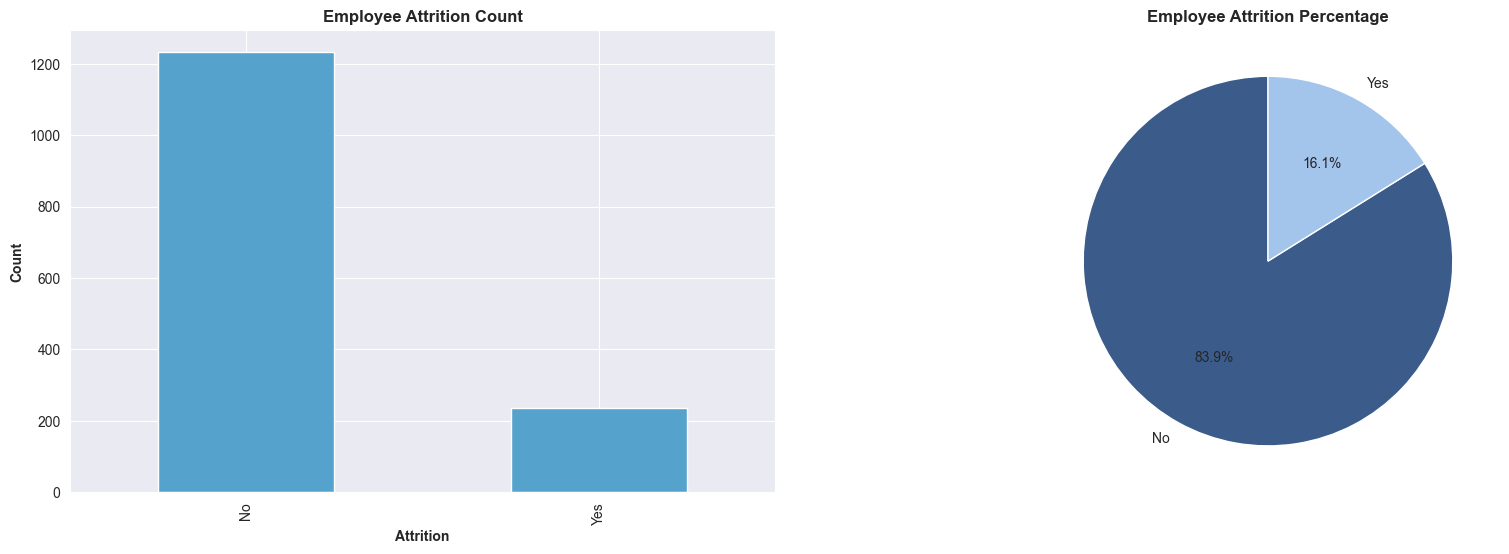

In [56]:
 # Plotting attrition rate and Count.
plots ( DATA , 'Attrition' )

The visualizations reveal that the majority of employees remain with the company, with only 16.1% having left. This indicates a relatively low attrition rate and confirms that the dataset is imbalanced.

Next, we will proceed with a bivariate analysis of categorical variables to explore potential relationships and patterns.

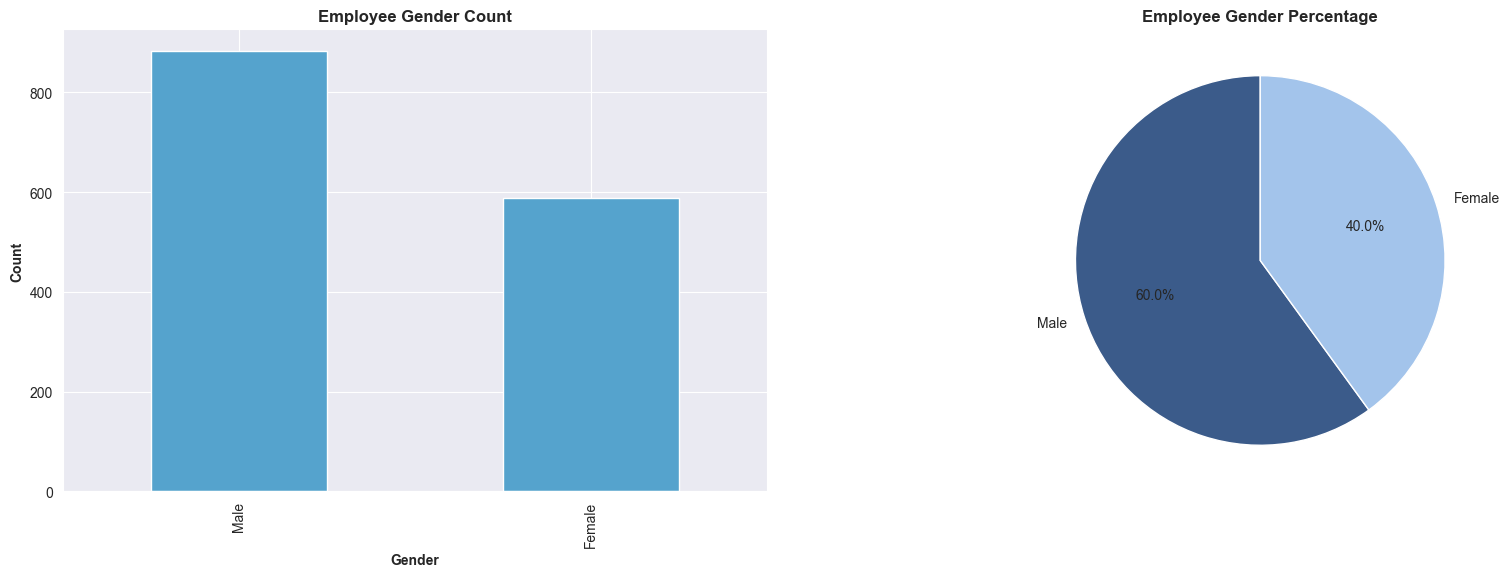

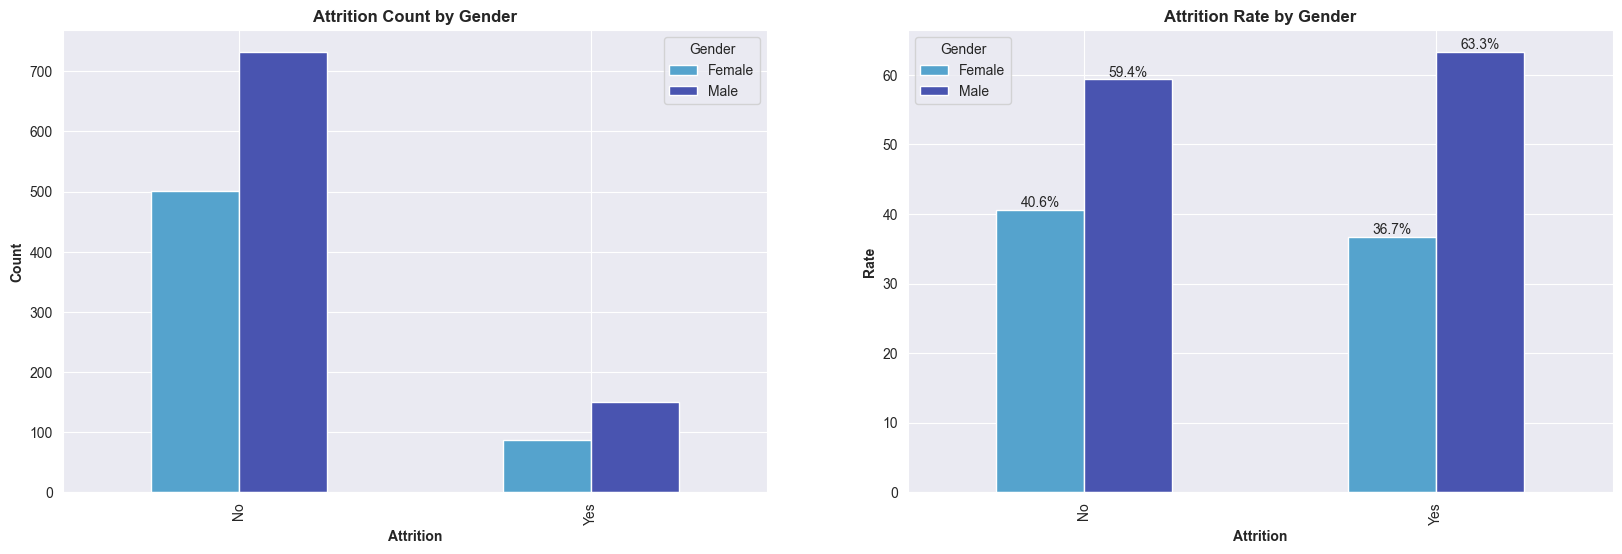

In [57]:
 # Visualizing Gender 
plots ( DATA , 'Gender' )

cat_plot( DATA , 'Attrition' , 'Gender' )


The gender distribution shows that approximately 60% of employees are male and 40% are female. Additionally, attrition appears to be higher among male employees, accounting for 63.3% of total attrition, compared to 36.7% for female employees.

This suggests that male employees are more likely to leave the organization than their female counterparts.

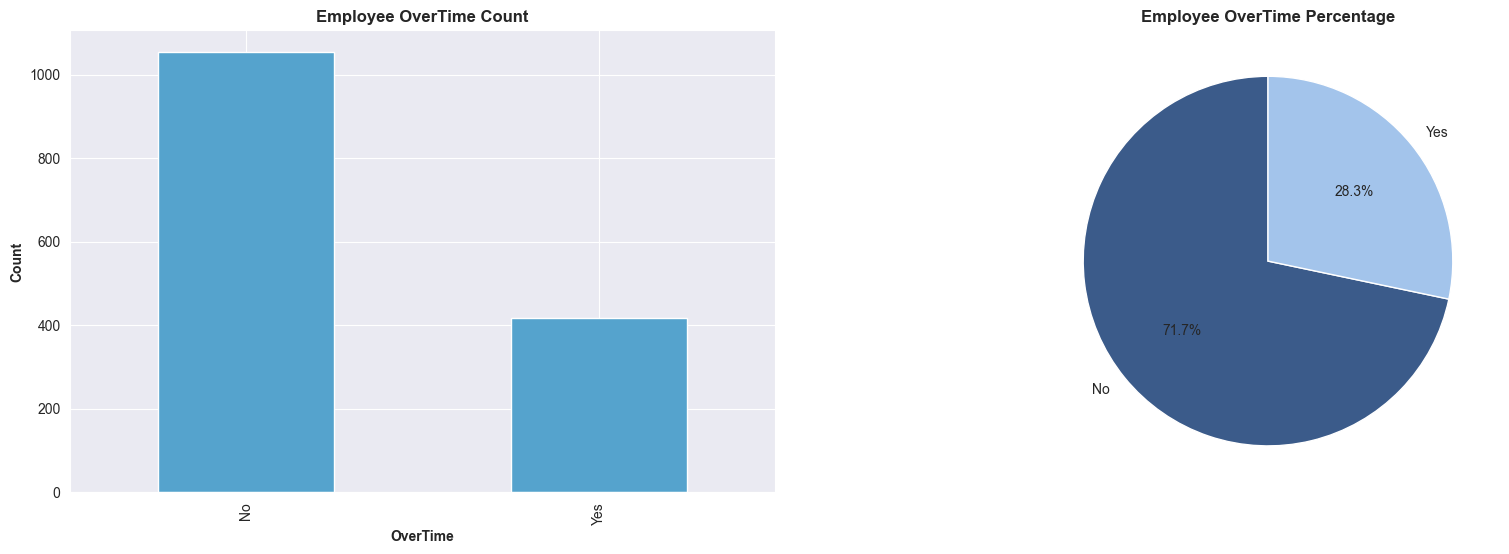

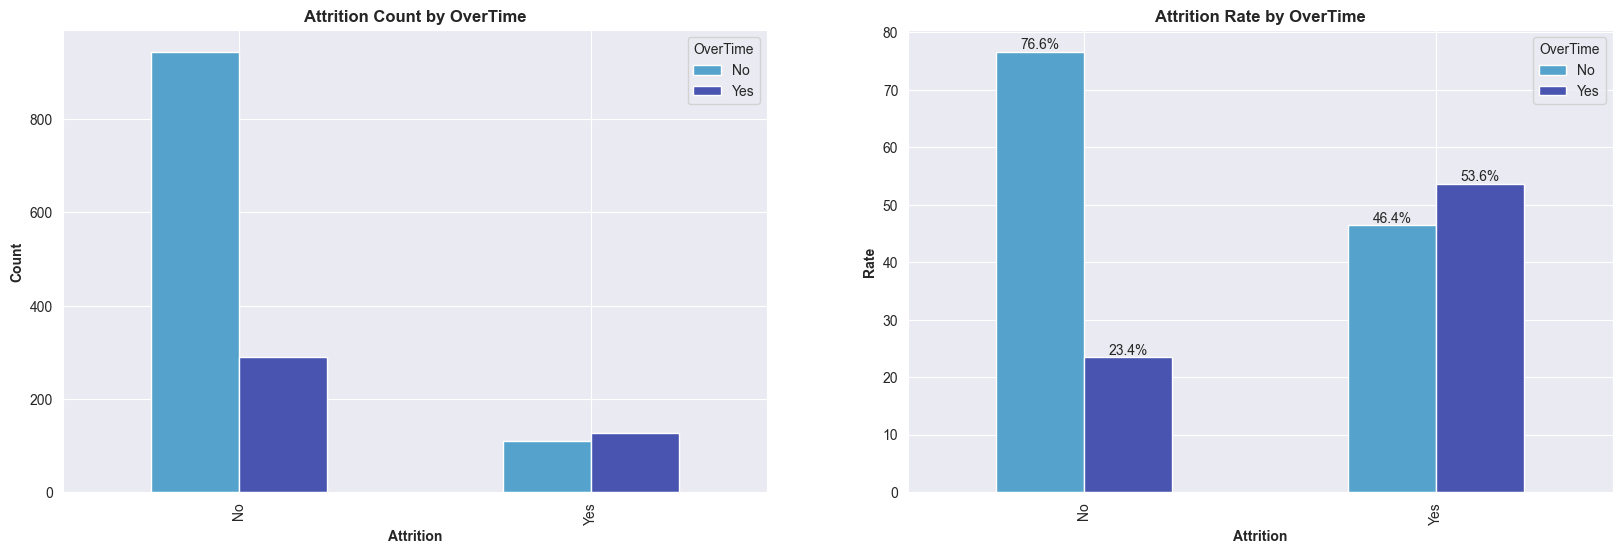

In [58]:
# plotting Overtime 
plots( DATA , 'OverTime' )
cat_plot( DATA , 'Attrition' , 'OverTime' )

The data indicates that the majority of employees do not work overtime, with only 28.3% reporting overtime hours.

However, employees who work overtime exhibit a notably higher attrition rate of 53.6%. In contrast, among those who work overtime, only 23.4% remain with the company, compared to 76.6% of employees who do not work overtime and continue their employment.

This suggests a potential link between working overtime and increased likelihood of attrition

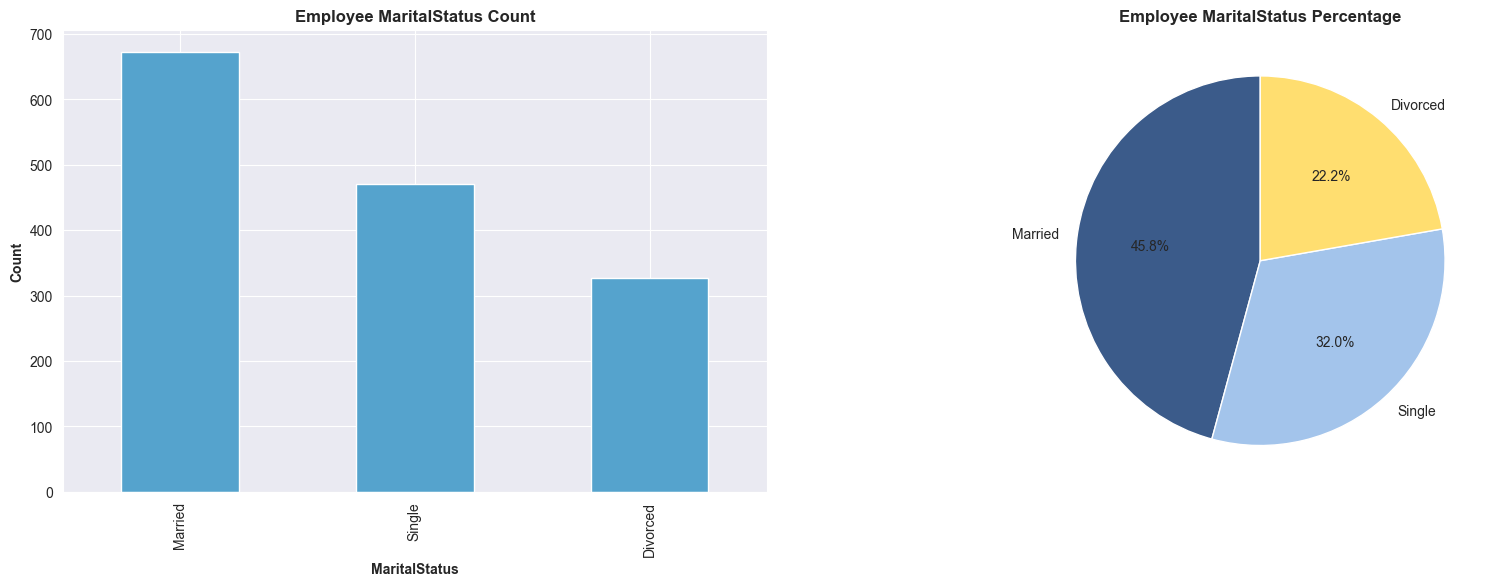

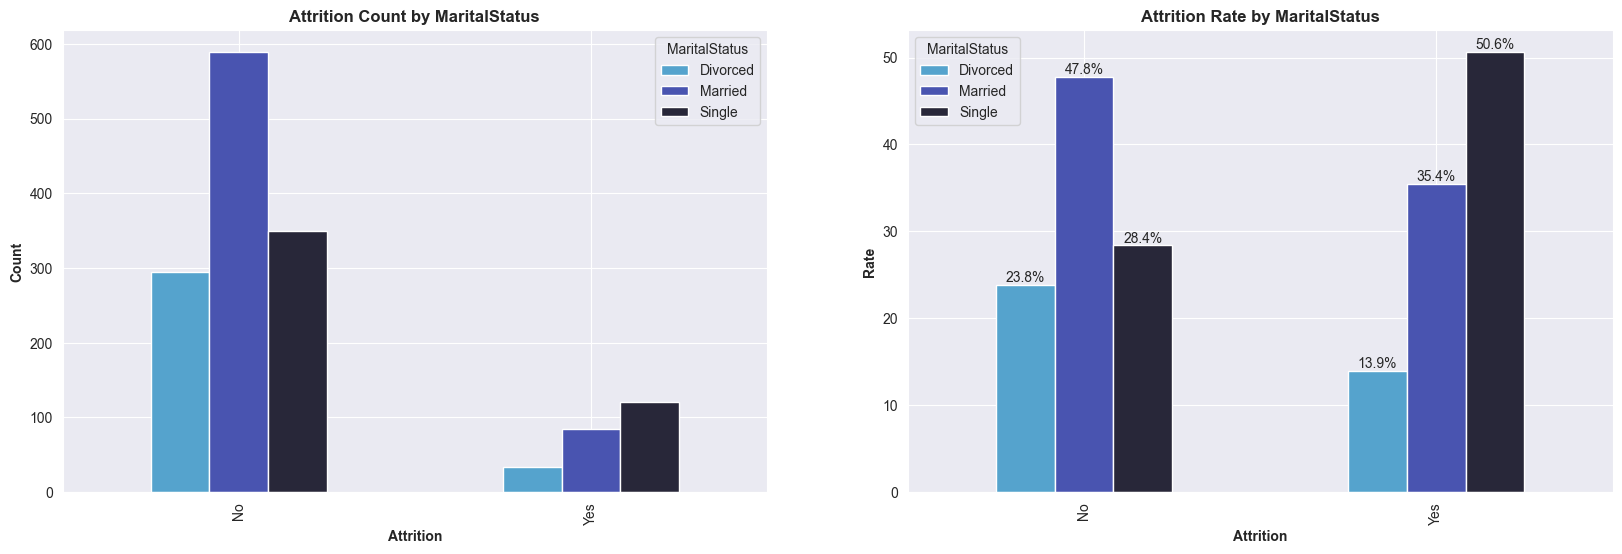

In [59]:
 # Plotting Marital Status
plots( DATA , 'MaritalStatus' )
cat_plot( DATA , 'Attrition' , 'MaritalStatus' )


The marital status distribution reveals that 45.8% of employees are married, 32.0% are single, and 22.2% are divorced.

Attrition is highest among single employees, who account for 50.6% of total attrition. Married employees exhibit a lower attrition rate at 35.4%, followed by divorced employees at 13.9%. Interestingly, divorced employees have the lowest attrition rate overall.

In terms of retention, 47.8% of married employees remain with the company, significantly higher than the 28.4% retention rate for single employees and 23.8% for divorced employees. This suggests that marital status may be associated with employee retention, with married employees showing a stronger likelihood of staying with the organization

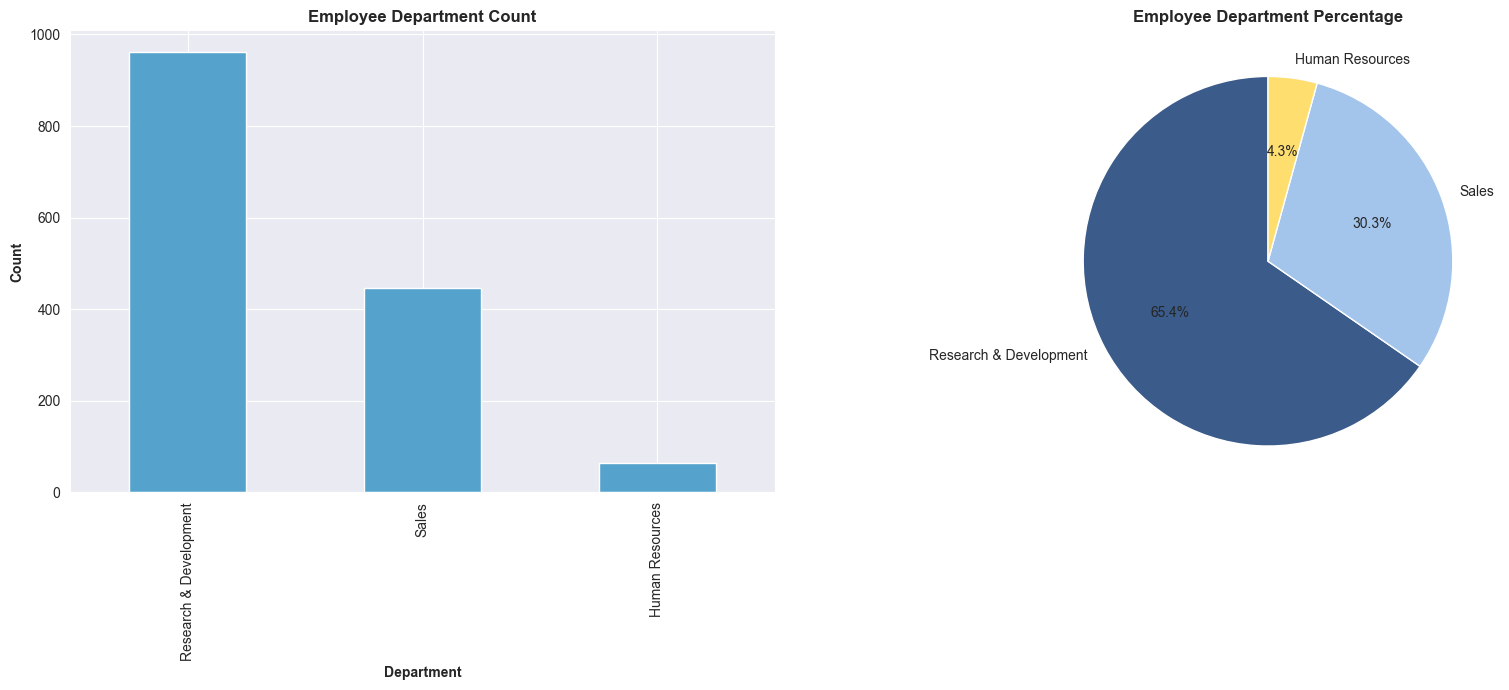

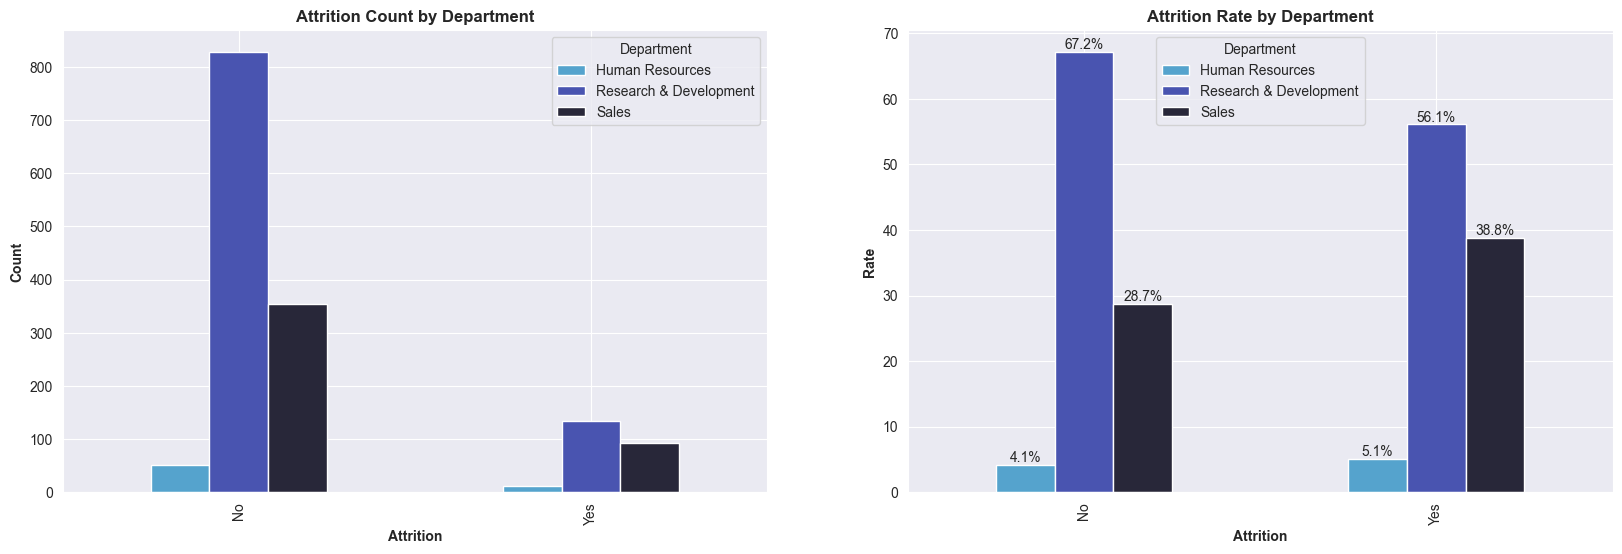

In [60]:
 # Plotting Department
plots ( DATA , 'Department' )
cat_plot( DATA , 'Attrition' , 'Department' )

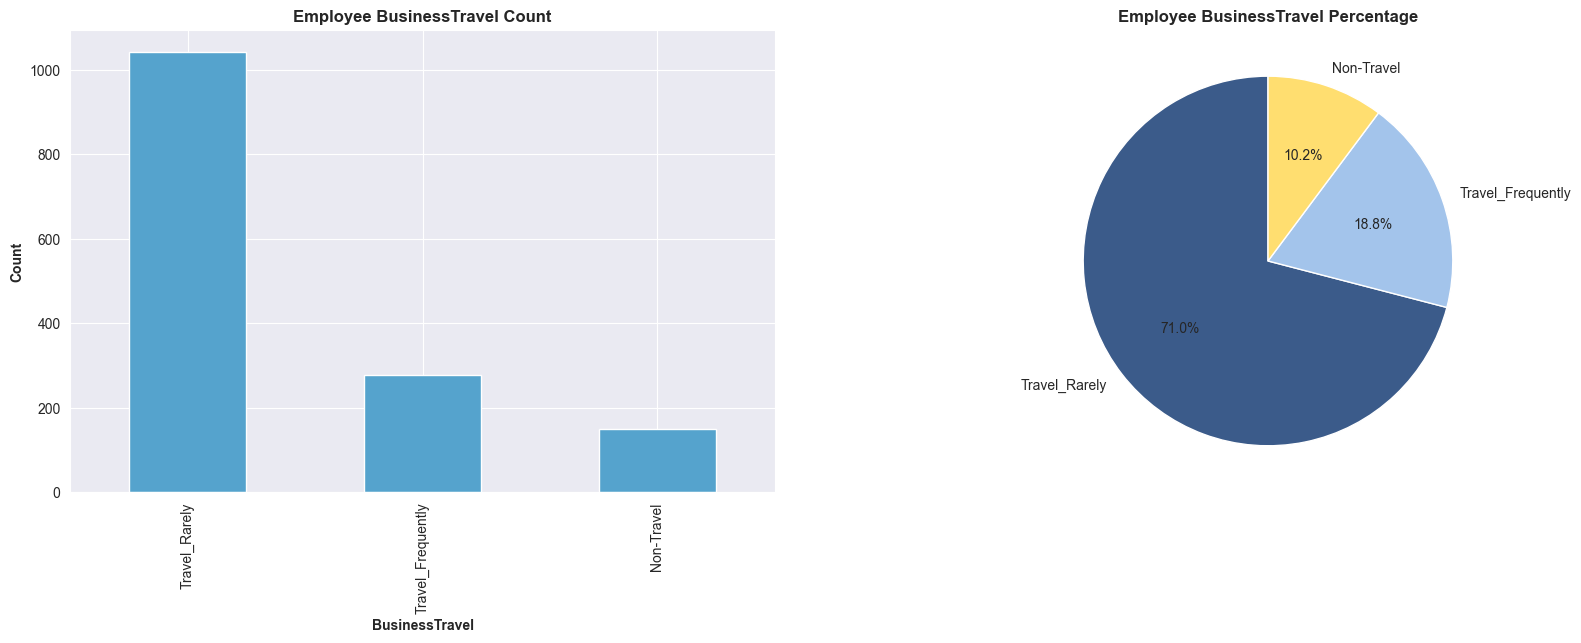

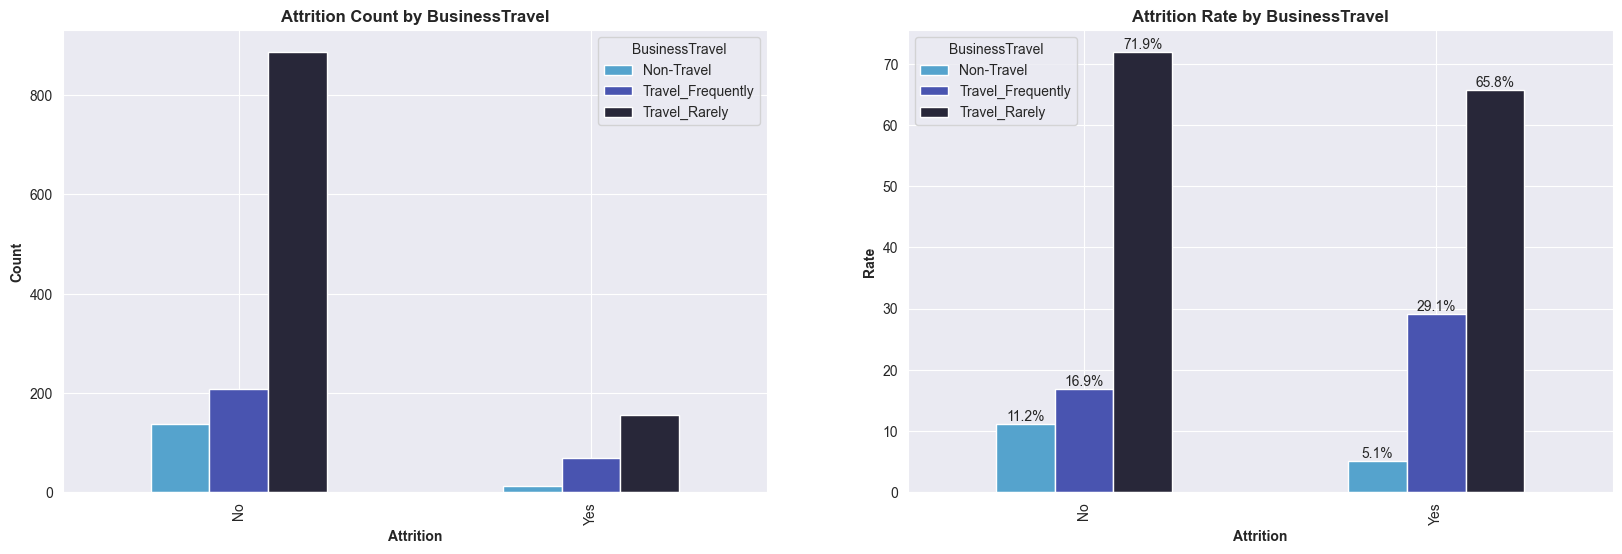

In [61]:
 # Plotting BusinessTravel
plots( DATA , 'BusinessTravel')
cat_plot( DATA , 'Attrition' , 'BusinessTravel' )

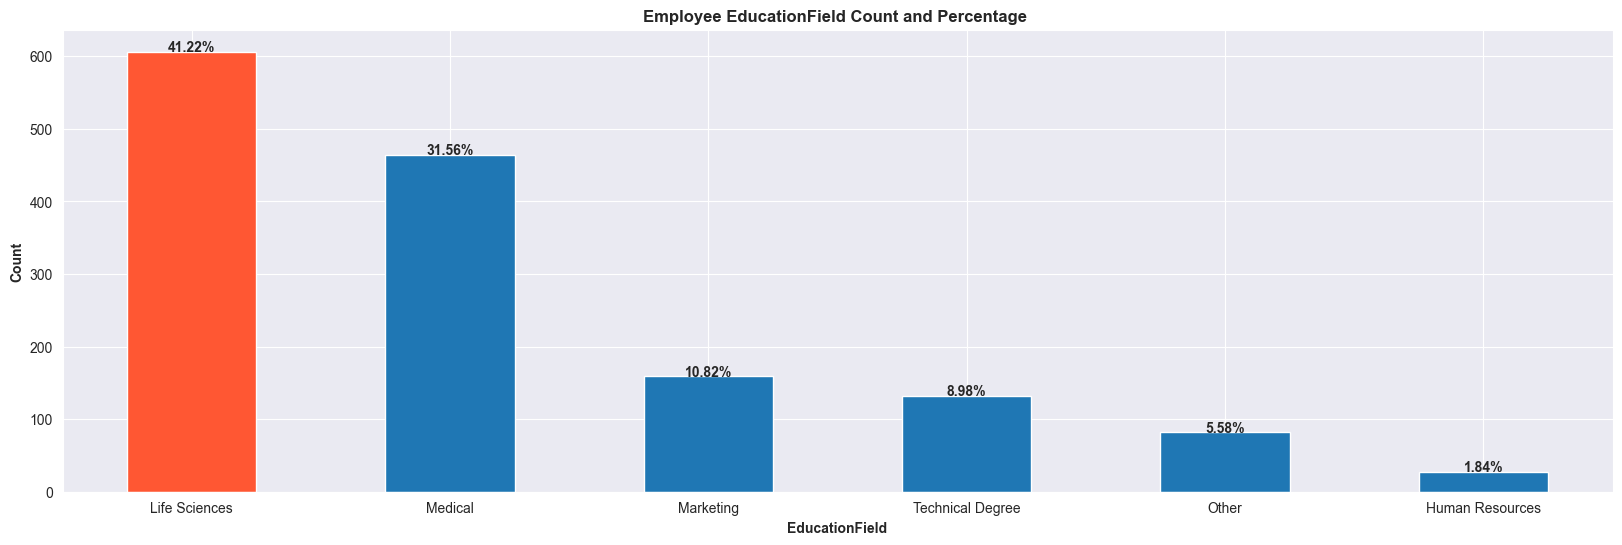

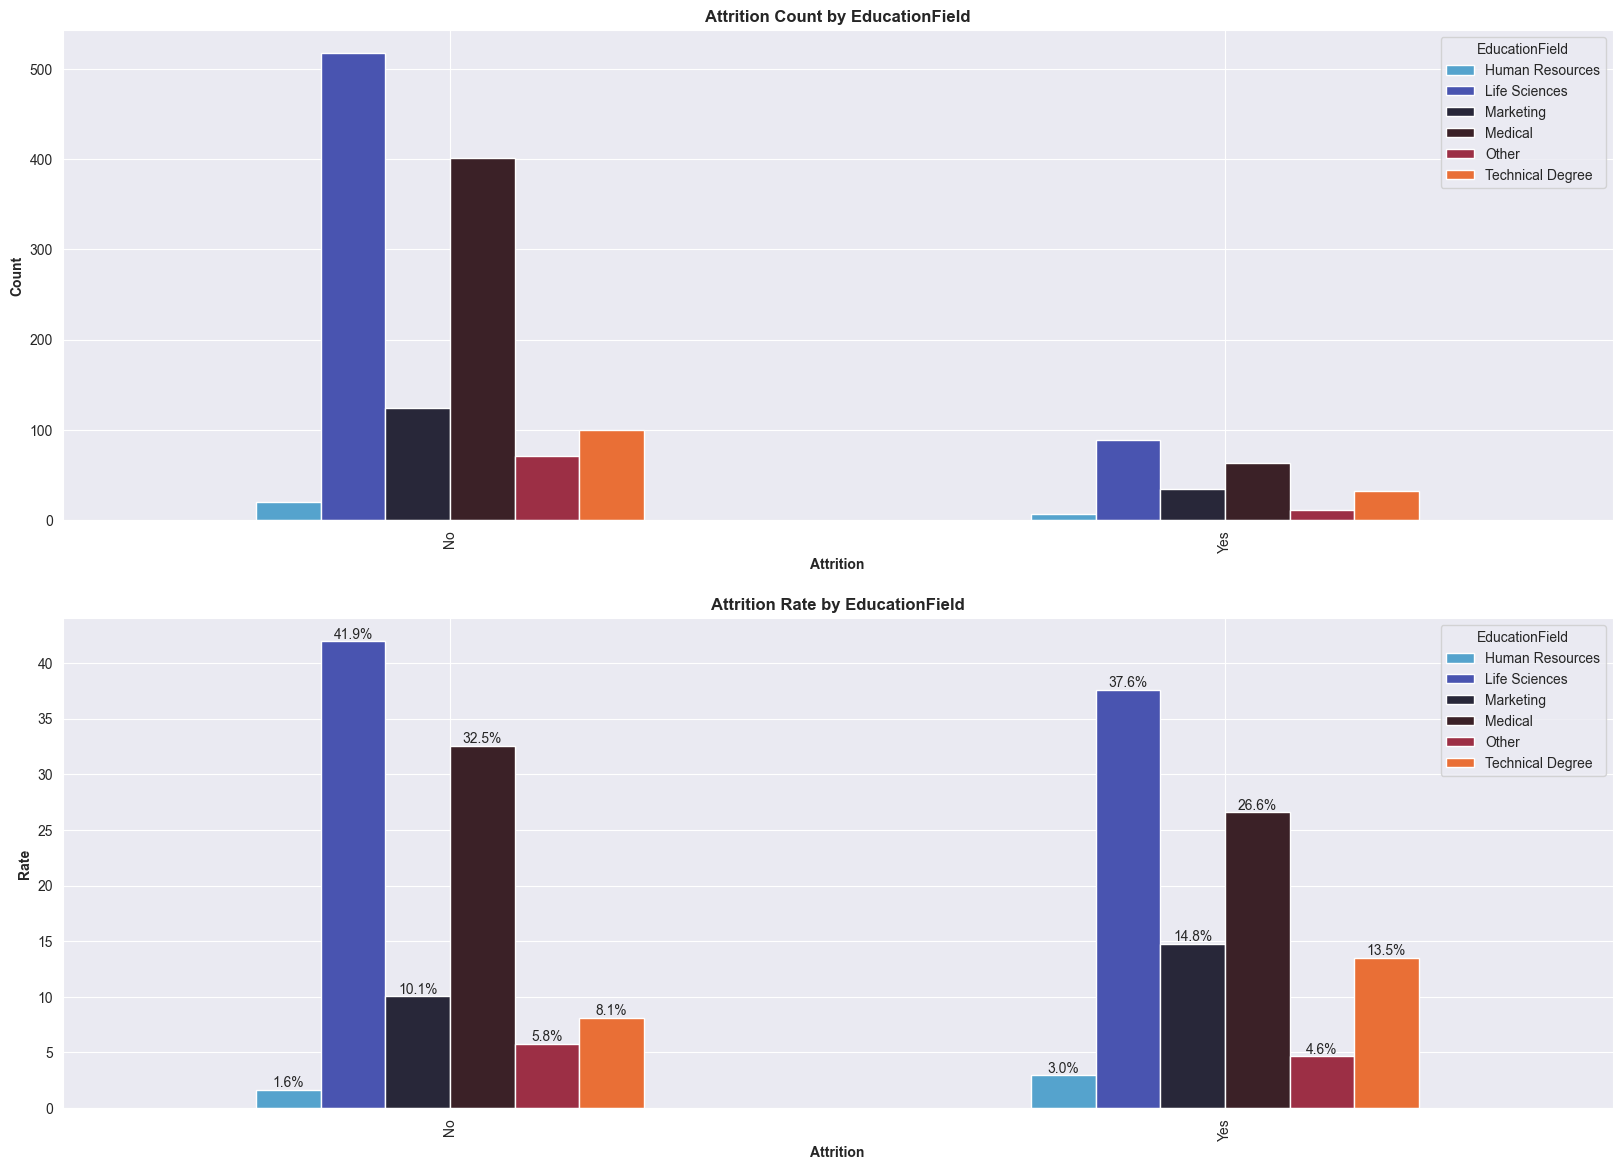

In [62]:
# Plotting
plots( DATA , 'EducationField')
cat_plot( DATA , 'Attrition' , 'EducationField' )

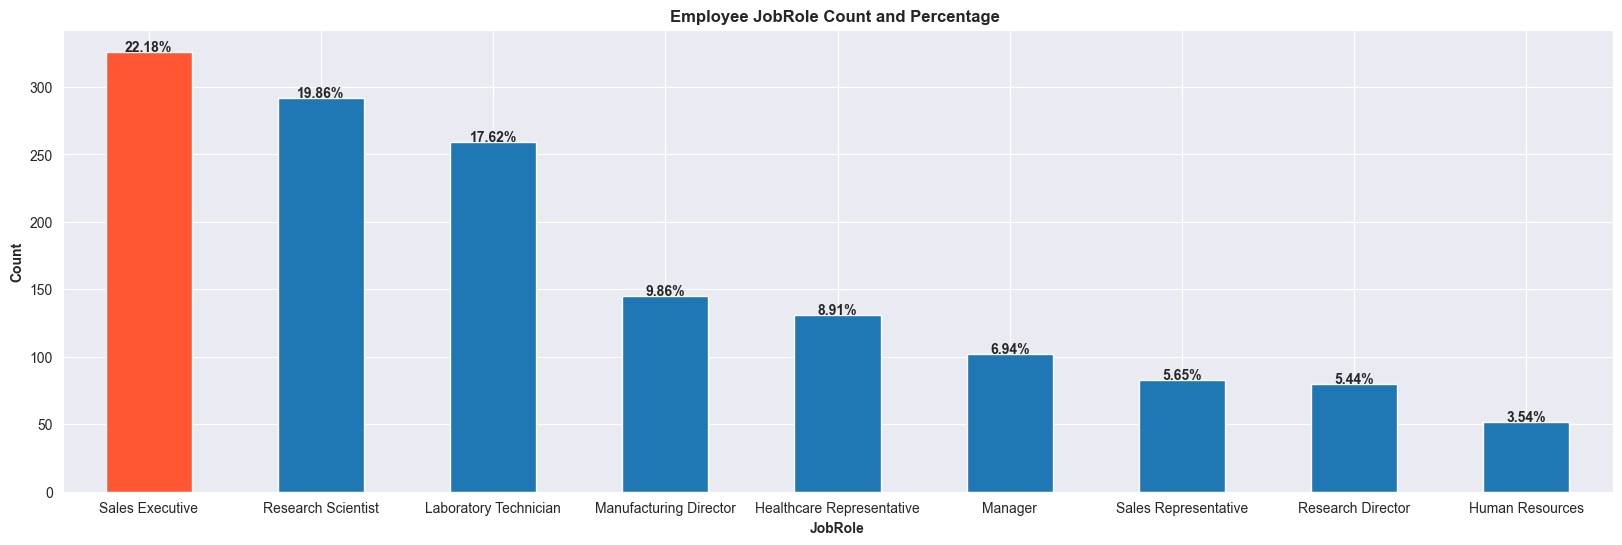

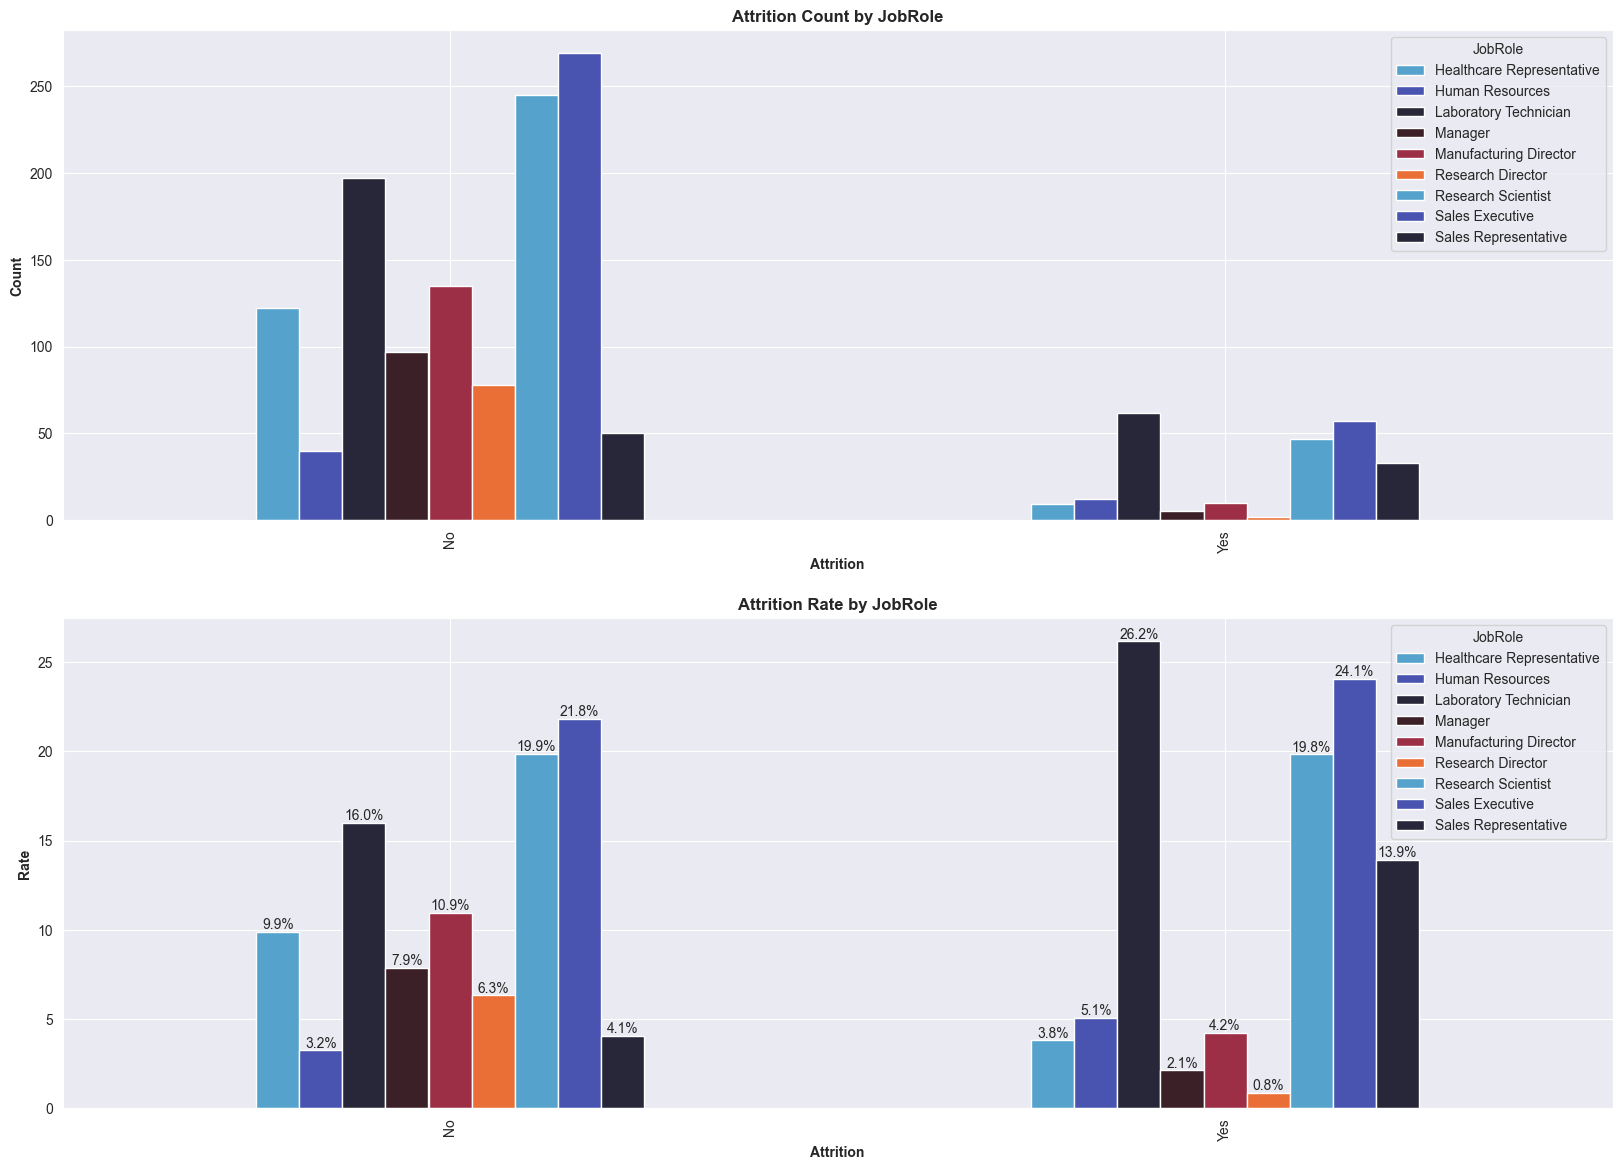

In [63]:
# Plotting Jobrole
plots( DATA , 'JobRole')
cat_plot( DATA , 'Attrition' , 'JobRole' )